In [1]:
from tools import *
import matplotlib.pyplot as plt
import cv2

In [2]:
get_aligned_images("test/", "aligned_images/")

Wrote result aligned_images/original.png
Wrote result aligned_images/IMG_3619.png
Wrote result aligned_images/makeup2.png
Wrote result aligned_images/makeup1.png


In [3]:
get_aligned_images("private_test/", "aligned_images/")

Wrote result aligned_images/IMG_1811.png


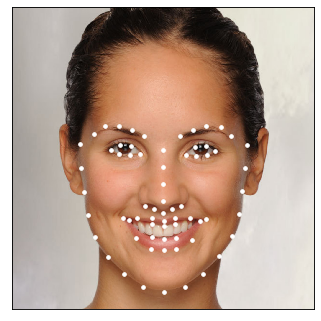

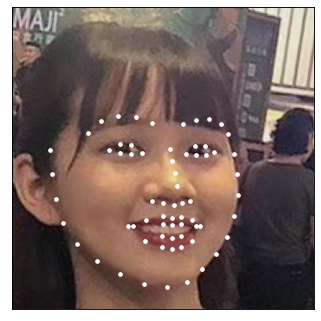

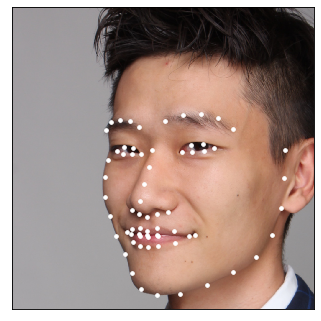

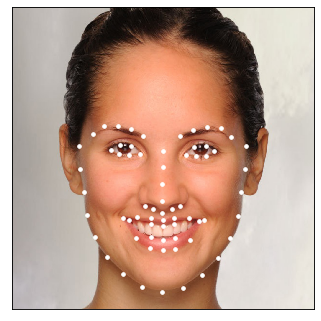

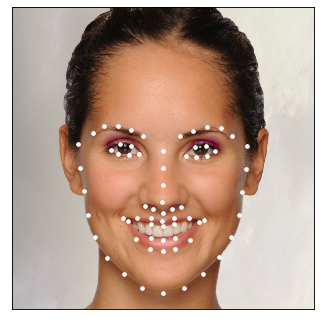

In [2]:
preds = get_draw_prediction_directory("aligned_images/")

In [3]:
im = plt.imread("aligned_images/original.png")
preds_1 = preds["aligned_images/original.png"]

predictions = get_features(preds_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


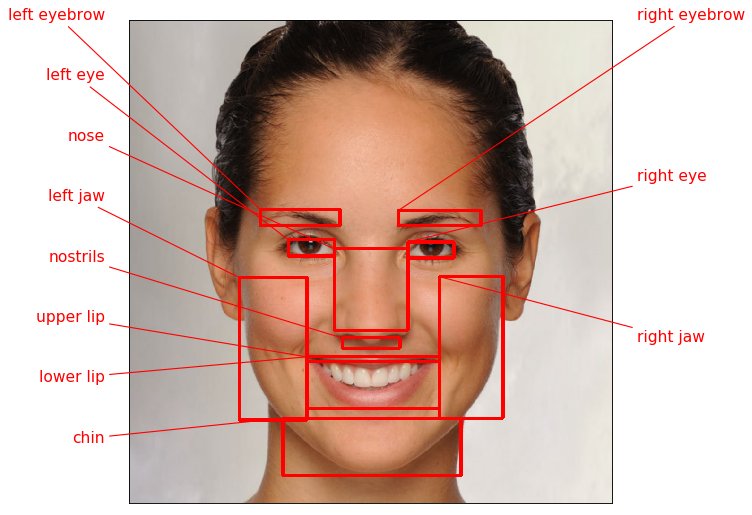

In [9]:
im_new = drawAnnotations(im, predictions)

In [4]:
private_img = "aligned_images/IMG_1811.png"

im = plt.imread(private_img)
preds_1 = get_landmarks_img(private_img)[private_img]

In [5]:
predictions = []
predictions.append(("left eyebrow", get_boxes(preds_1[18:22])))
predictions.append(("right eyebrow", get_boxes(preds_1[22:27])))
predictions.append(("nose", get_boxes(np.append(preds_1[27:31], [preds_1[39], preds_1[42]], axis=0))))
predictions.append(("nostrils", get_boxes(preds_1[31:36])))
predictions.append(("left eye", get_boxes(preds_1[36:42])))
predictions.append(("right eye", get_boxes(preds_1[42:48])))
predictions.append(("upper lip", get_boxes(preds_1[48:55])))
predictions.append(("lower lip", get_boxes(np.append(preds_1[54:60], [preds_1[48]], axis=0))))
predictions.append(("left jaw", get_boxes(np.append(preds_1[1:6], [preds_1[48]], axis=0))))
predictions.append(("right jaw", get_boxes(np.append(preds_1[11:16], [preds_1[54]], axis=0))))
predictions.append(("chin", get_boxes(preds_1[5:12])))

In [ ]:
im_new = drawAnnotations(im, predictions)